In [2]:
# Import helpful libraries and modules

import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random as rand
import datetime as dt

Let's start with the .csv file "movie_gross".

In [4]:
gross_revenue_by_film = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')

In [5]:
gross_revenue_by_film.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


At a glance, this csv contains the titles of movies, along with some kind of initials or code representing the studio that produced it, the domestic gross revenue, foreign gross revenue, and the year in which the film was released.

In [6]:
gross_revenue_by_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Dealing With Missing Values
* I am most likely going to DROP the records with a null value for studio because there are only 5 such records.
* There are 28 records missing a value for domestic-gross. I may drop these, or simply fill them in with the mean or median.
* My real concern is that I am missing almost 1000 values in the foreign_gross column. I may keep these "null" values as a separate category, and primarily focus on the domestic gross and studio to inform my analysis.

#### Are there any other missing values?

In [8]:
rand.seed(39)
indices = rand.sample(range(0,len(gross_revenue_by_film)), 10)
gross_revenue_by_film.loc[indices]

,title,studio,domestic_gross,foreign_gross,year
859,The Master,Wein.,16399999.0,11900000,2012
1063,The Woman in the Fifth,ATO,114000.0,NaN,2012
1578,3 Days to Kill,Rela.,30700000.0,21900000,2014
106,Death at a Funeral (2010),SGem,42700000.0,6300000,2010
798,Think Like a Man,SGem,91500000.0,4500000,2012
903,Hyde Park on Hudson,Focus,6400000.0,2500000,2012
1620,Labor Day,Par.,13400000.0,6900000,2014
2985,Buena Vista Social Club: Adios,BG,123000.0,578000,2017
2304,Ashby,TFA,4600.0,NaN,2015
21,Resident Evil: Afterlife,SGem,60100000.0,240100000,2010


### Digging into Columns

In [13]:
gross_revenue_by_film.title.describe() # Need to check for duplicates & remove based on title column

count          3387
unique         3386
top       Bluebeard
freq              2
Name: title, dtype: object

In [14]:
gross_revenue_by_film.studio.describe()

count     3382
unique     257
top        IFC
freq       166
Name: studio, dtype: object

In [15]:
gross_revenue_by_film.studio.value_counts()

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
        ... 
SMod       1
Saban      1
App.       1
MSF        1
AM         1
Name: studio, Length: 257, dtype: int64

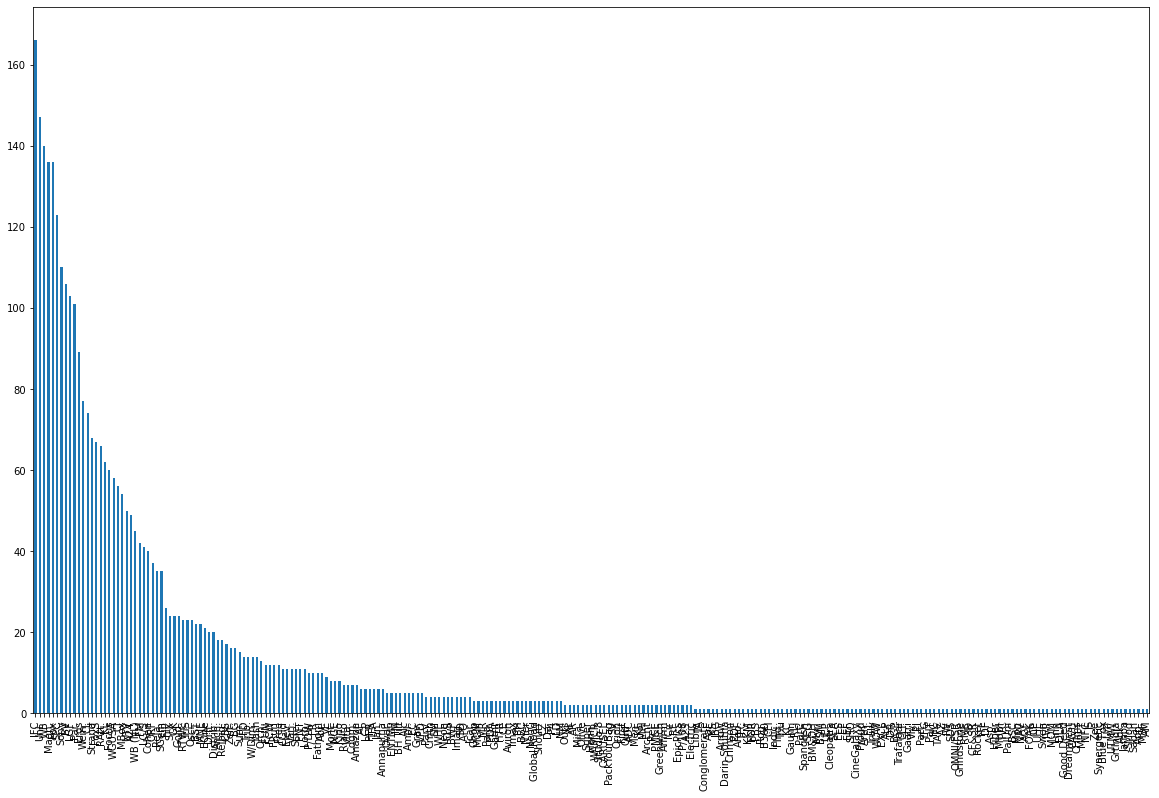

In [28]:
# Should I do anything to account for the fact that some studios are "over-represented" or "under-represented" in this data
# set? Or just keep in mind that Microsoft wants to make lots of movies that are profitable, not just one or two.

fig, ax = plt.subplots(figsize=(20, 13))

gross_revenue_by_film.studio.value_counts().plot(kind='bar', ax=ax)

plt.show();

In [31]:
gross_revenue_by_film.domestic_gross.describe()
# The mean domestic gross revenue is between 28 and 29 million!
# The standard deviation is higher than the mean.
# The minimum domestic gross revenue of any film in this dataset is $100.
# The maximum domestic gross revenue was 93.67 million. O.O

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

I am curious...
* Which film made nearly 100 million in domestic gross revenue???
* Is the film that made \\$100 a mistake? Or just an outlier?

In [32]:
gross_revenue_by_film.foreign_gross.describe() # Oh no. Convert foreign_gross values to floats.

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [60]:
gross_revenue_by_film.foreign_gross.value_counts()

1200000      23
1100000      14
4200000      12
1900000      12
2500000      11
             ..
19800000      1
25700000      1
309200000     1
203500000     1
75200000      1
Name: foreign_gross, Length: 1204, dtype: int64

When I call describe(), foreign_gross appears to contain strings. When I call value_counts(), foreign_gross appears to contain integers. What is going on here?

In [36]:
gross_revenue_by_film.foreign_gross.astype(float) # Error says a value cannot be converted to float.

ValueError: could not convert string to float: '1,131.6'

In [34]:
gross_revenue_by_film[gross_revenue_by_film.foreign_gross == '1,131.6'] # Find record with this value.

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015


The problem is probably the comma. Apparently the "astype" function can't handle turning a numerical string with commas into a float.

In [38]:
gross_revenue_by_film.foreign_gross.map(lambda x: x.replace(',', '')) # Can't apply this to all values since some are not strings.

AttributeError: 'float' object has no attribute 'replace'

In [40]:
gross_revenue_by_film.foreign_gross.map(lambda x: type(x)).value_counts()

<class 'str'>      2037
<class 'float'>    1350
Name: foreign_gross, dtype: int64

In [49]:
type(4567.8)

float

In [52]:
def to_float(value):
# This custom function returns the value if already a float, otherwise, treats it as a string, removes 1 comma & converts to
# a float.
    if type(value) == float:
        return value
    else:
        value = value.replace(',', '')
        value = value.strip()
        return float(value)

In [53]:
gross_revenue_by_film.foreign_gross.map(to_float)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [54]:
# Check that custom function mapped to foreign_gross column worked! Are all values floats now? (Or null)

In [55]:
gross_revenue_by_film.foreign_gross.describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [ ]:
# NOOO dtype is still object =( LOL I forgot to replace the column

In [56]:
gross_revenue_by_film.foreign_gross = gross_revenue_by_film.foreign_gross.map(to_float)

In [57]:
gross_revenue_by_film.foreign_gross.describe() # It WORKED!!! :D

count    2.037000e+03
mean     7.487281e+07
std      1.374106e+08
min      6.000000e+02
25%      3.700000e+06
50%      1.870000e+07
75%      7.490000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

In [60]:
gross_revenue_by_film.year.describe()

count    3387.000000
mean     2013.958075
std         2.478141
min      2010.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

This data set contains movies made between 2010 and 2018.

In [61]:
gross_revenue_by_film.year.value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

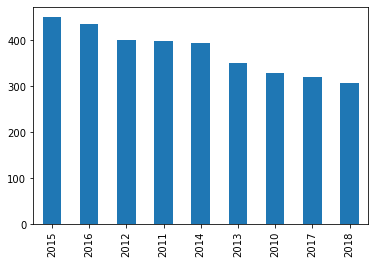

In [63]:
gross_revenue_by_film.year.value_counts().plot(kind='bar');